## Problem Statement

## Scipy:

We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import linalg
from scipy import optimize

## Data

In [2]:
max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

## Problem 1

Fitting it to the periodic function

** Use Scipy Optimize module

In [3]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

months = np.arange(12)
res_max, cov_max = optimize.curve_fit(yearly_temps, months, max_temp, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months, min_temp, [-40, 20, 0])

## Problem 2

Plot the fit

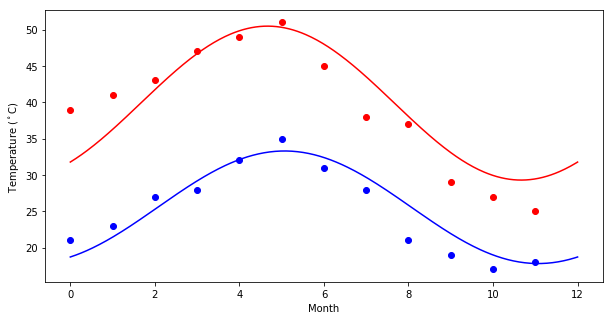

In [4]:
days = np.linspace(0, 12, num = 365)

plt.figure(figsize = (10,5))
plt.plot(months, max_temp, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, min_temp, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^ \circ$C)')
plt.show()


## Matplotlib:

This assignment is for visualization using matplotlib:

data to use: url = https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv


In [5]:
url = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
df = pd.read_csv(url)

In [6]:
titanic = pd.DataFrame(df, columns = ['age', 'sex', 'fare'])
print(titanic)

          age     sex      fare
0     29.0000  female  211.3375
1      0.9167    male  151.5500
2      2.0000  female  151.5500
3     30.0000    male  151.5500
4     25.0000  female  151.5500
5     48.0000    male   26.5500
6     63.0000  female   77.9583
7     39.0000    male    0.0000
8     53.0000  female   51.4792
9     71.0000    male   49.5042
10    47.0000    male  227.5250
11    18.0000  female  227.5250
12    24.0000  female   69.3000
13    26.0000  female   78.8500
14    80.0000    male   30.0000
15        NaN    male   25.9250
16    24.0000    male  247.5208
17    50.0000  female  247.5208
18    32.0000  female   76.2917
19    36.0000    male   75.2417
20    37.0000    male   52.5542
21    47.0000  female   52.5542
22    26.0000    male   30.0000
23    42.0000  female  227.5250
24    29.0000  female  221.7792
25    25.0000    male   26.0000
26    25.0000    male   91.0792
27    19.0000  female   91.0792
28    35.0000  female  135.6333
29    28.0000    male   26.5500
...     

## Charts to Plot:

## Problem 1

Create a pie chart presenting the male/female proportion

In [7]:
male_v_female = pd.value_counts(titanic['sex'])
print(male_v_female)

male      843
female    466
Name: sex, dtype: int64


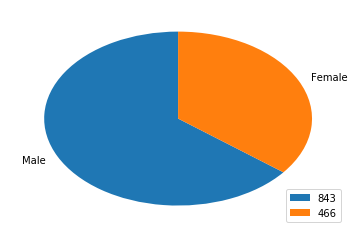

In [8]:
labels = ('Male', 'Female')
plt.pie(male_v_female, labels = labels, startangle=90)
plt.legend(male_v_female)
plt.show()

## Problem 2

Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

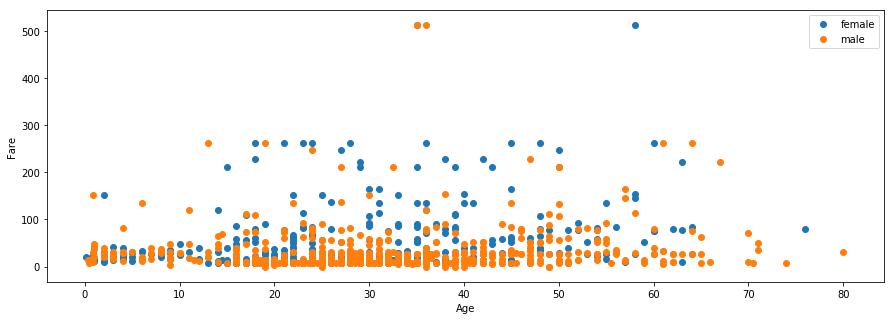

In [25]:
x = titanic.age
y = titanic.fare
labels = titanic.sex

df = pd.DataFrame(dict(x=x, y=y, label=labels))
groups = df.groupby('label')

plt.figure(figsize = (15,5))

for name, group in groups:
    plt.scatter(group.x, group.y, marker='o', label=name)

plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(numpoints = 1)
plt.show()